Web Scraping

In [1]:
import pandas as pd
from collections import defaultdict
from bs4 import BeautifulSoup as bs
import requests

In [3]:
teams = ["ATL", "BOS", "NJN", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOH", "NYK", "OKC", "ORL", "PHI", "PHO", "POR",  "SAC", "SAS", "TOR", "UTA", "WAS"] #Currently ATL is missing as that was added above
#teams = ["ATL", "BOS", "NJN", "CHA", "CHI", "CLE","DAL", "DEN", "DET", "GSW", "HOU"]
#teams = ["ATL", "BOS", "NJN"]
df = pd.DataFrame()
for team in teams:
    url = "https://www.basketball-reference.com/teams/" + team + "/"
    html = requests.get(url)
    print(html.status_code)
    soup = bs(html.content)
    specifier = "#" + team + " > tbody"
    body = soup.select(specifier)
    rows = body[0].select('tr')
    team_data = []
    data = defaultdict(list)
    cols = ['Lg','Team','W','L','W/L%','Finish','SRS','Pace','Rel Pace','ORtg','Rel ORtg','DRtg','Rel DRtg','Playoffs','Coaches','Top WS']

    for row in rows:
        data['season'].append(row.select('th')[0].text)
        temp = row.select('td')
        temp.pop(7)
        temp.pop(13)
        for i in range(len(cols)):
            data[cols[i]].append(temp[i].text)
    team_data = pd.DataFrame(data)
    df = pd.concat([df, team_data])
print(df.head(5))
print(df.tail(5))
df.to_csv(r"C:\Users\ofior\Documents\4185", sep = "\t", encoding = "utf-8")
#I am not sure this will work on your computer

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
    season   Lg            Team   W   L  W/L%    Finish    SRS   Pace  \
0  2022-23  NBA   Atlanta Hawks  13  13  .500  1st of 5  -0.48  100.5   
1  2021-22  NBA  Atlanta Hawks*  43  39  .524  2nd of 5   1.55   97.7   
2  2020-21  NBA  Atlanta Hawks*  41  31  .569  1st of 5   2.14   97.6   
3  2019-20  NBA   Atlanta Hawks  20  47  .299  5th of 5  -7.71  103.0   
4  2018-19  NBA   Atlanta Hawks  29  53  .354  5th of 5  -6.06  103.9   

  Rel Pace   ORtg Rel ORtg   DRtg Rel DRtg                Playoffs  \
0      1.1  111.7     -1.2  112.4     -0.5                           
1     -0.5  116.5      4.5  114.9      2.9  Lost E. Conf. 1st Rnd.   
2     -1.6  115.7      3.4  113.3      1.0    Lost E. Conf. Finals   
3      2.7  107.2     -3.4  114.8      4.2                           
4      3.9  108.1     -2.3  113.9      3.5                           

                    

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\ofior\\Documents\\4185'

In [1]:
import pandas as pd
df = pd.read_csv(r'bball_data.csv')
df.isnull().sum()
#print("----")

Unnamed: 0      0
season          0
Lg              0
Team            0
W               0
L               0
W/L%            0
Finish          0
SRS             0
Pace           20
Rel Pace       20
ORtg           20
Rel ORtg       20
DRtg           20
Rel DRtg       20
Playoffs      656
Coaches         0
Top WS          0
dtype: int64

In [ ]:
df = pd.read_csv(r'bball_data.csv')
list(df.columns)
df.columns = [c.replace(' ', '_') for c in df.columns]
#print(len(df["DRtg"]))
#print(len(df["ORtg"]))
avg = lambda row: (row.ORtg - row.DRtg) #Creates a new column created from the ORtf and DRtg data.  Note that this column could have been calculated using relative ratings either.  The result is identical
col1 = df.apply(avg, axis =1)
df = df.assign(TRtg=col1.values)

df.columns = df.columns.str.replace("W/L%", "W_L_Pct")
wins = lambda row: ((row.W_L_Pct) * 82) #Converts Winning Percent to a per 82 games basis which is standard but more on this below
per = df.apply(wins, axis = 1)
df = df.assign(WP82G = per.values)

df = df.drop(df.columns[[0]], axis = 1)


#df.head(5)
df["Top_WS"] = df["Top_WS"].str.replace('(',',')
df["Top_WS"] = df["Top_WS"].str.replace(')','')

df["Playoffs"] = df["Playoffs"].fillna('No')
df = df.loc[df["season"] != "2022-23"] #Drops the values for 2022-2023 season, more on this below
df = df.dropna(axis = 0)
df.head(5)
df.isnull().sum()
#print(len(df))
#print(len(df))


Wins cannot be used as a metric for how strong a team is because of irregular seasons such as during the 2019-2020 season which was impacted by COVID and the 2011-2012 season which had a lockout which shortened the season to 66 games.  I think it is easier to understand performance based on wins which is a concrete number (Usually between 20 and 70) rather than win percent (0 to 1).

Drops the values for the 2022-2023 season.  Basketball Reference is constantly updated meaning that while working on this project, data could be inputted that could change models, graphs, etc.  Additionally as we are relatively early through the 2022-2023 season (only around 25 games), the data will be excluded because of its smaller sample size.  Metrics such as offensive and defensive efficiency on a smaller sample size may be more extreme because of the smaller sample size.  A team that has played weak teams through only 25 games and played really well, may appear to be better than they actually are.  Thus their wins through roughly a quarter of the season would make up a disproportionate amount of their total wins (ex: 25% of the season accounting for 40% of their season wins).

In [84]:
df.to_csv("bball_cleaned.csv")

In [85]:
df = pd.read_csv("bball_cleaned.csv")
#df.head(5)
df = df.drop(df.columns[[0]], axis = 1)
df.head()
df.isnull().sum()
#Drops the Unnamed Column

season      0
Lg          0
Team        0
W           0
L           0
W_L_Pct     0
Finish      0
SRS         0
Pace        0
Rel_Pace    0
ORtg        0
Rel_ORtg    0
DRtg        0
Rel_DRtg    0
Playoffs    0
Coaches     0
Top_WS      0
TRtg        0
WP82G       0
dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ofior\AppData\Local\Temp\ipykernel_50120\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

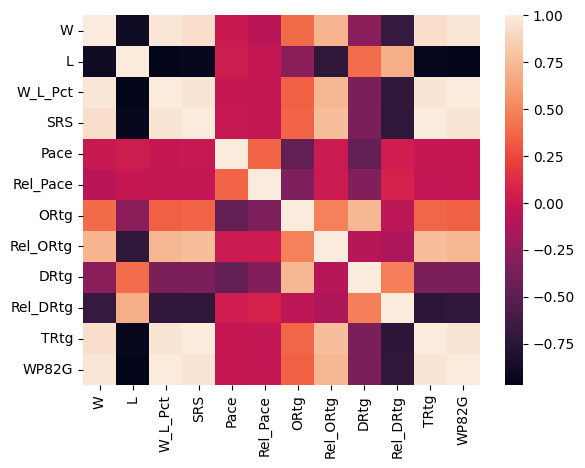

In [6]:
sns.heatmap(df.corr())

The heat map shows a lot of very strong correlations regarding how good a team is.  However, many of the very strong correlations are not helpful.  For example: the number of wins a team has is extremely well correlated with the number of losses, but that does not actually help to predict anything as a team can only win or lose games.  Likewise, wins and losses are very heavily correlated with WP82G and W_L_Pct, but those too are not meaningful.  SRS is a rating algorithm developed by Basketball Reference that takes in factors such as average point differential and strength of schedule, both of which are correlated with how strong teams are.

Text(0.5, 1.0, 'Total Efficiency Rating versus Wins Per 82 Games')

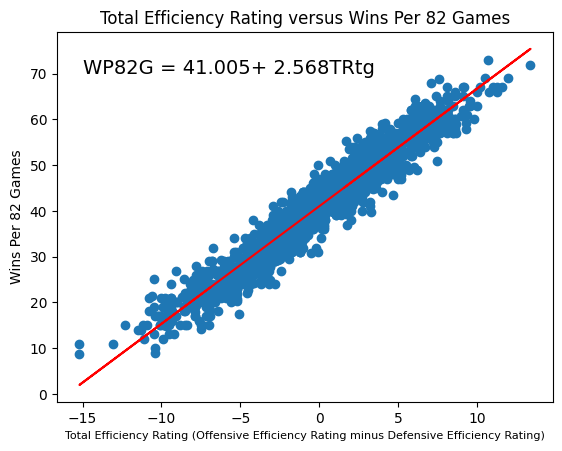

In [58]:
import numpy as np
x = np.array(df["TRtg"])
y = np.array(df["WP82G"])
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red', linestyle = '-')
plt.text(-15, 70, "WP82G = " + "{:.3f}".format(b) + "+ {:.3f}".format(m) + "TRtg", size = 14)
plt.xlabel("Total Efficiency Rating (Offensive Efficiency Rating minus Defensive Efficiency Rating)", size = 8)
plt.ylabel("Wins Per 82 Games")
plt.title("Total Efficiency Rating versus Wins Per 82 Games")


There is a strong correlation between a Total Rating (calculated by Offensive Rating - Defensive Rating), which is equal to point differential after 100 offensive and defensive possessions.  This is not particularly suprising as a team that score a lot of points and don't allow many points will have a high Total Rating and thus should win more games.

Text(0.5, 1.0, 'Pace and Relative Pace versus Wins per 82 games')

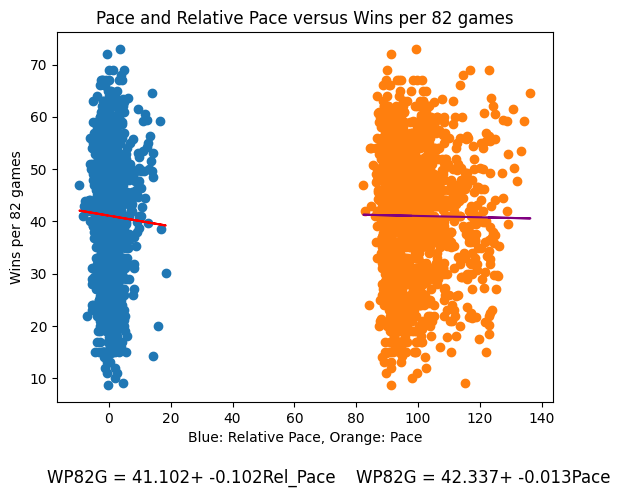

In [60]:
x = np.array(df["Rel_Pace"])
y = np.array(df["WP82G"])
x2 = np.array(df["Pace"])
plt.scatter(x, y)
plt.scatter(x2,y)
m, b = np.polyfit(x, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x, m*x + b, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(-20, -10, "WP82G = " + "{:.3f}".format(b) + "+ {:.3f}".format(m) + "Rel_Pace", size = 12)
plt.text(80, -10, "WP82G = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "Pace", size = 12)
plt.xlabel("Blue: Relative Pace, Orange: Pace")
plt.ylabel("Wins per 82 games")
plt.title("Pace and Relative Pace versus Wins per 82 games")

Pace of play is an estimate of the number of possessions per 48 minutes. Relative pace of play is the team's possessions per 48 minutes.  The shot clock in the NBA is 24 seconds, meaning that after inbounding the ball or acquiring possession via steal, block, etc. teams have 24 seconds to produce a shot that hits the rim.  Teams with a high pace take shots earlier in the 24 second period compared to teams with a slow pace.  What the graph suggests is that pace is a poor determiner of how many games a team wins.  Pace is an extremely poor estimator and the reason for this is probably because pace of play has changed over time.

Text(0.5, 1.0, 'Total Efficiency Rating versus Wins Per 82 Games')

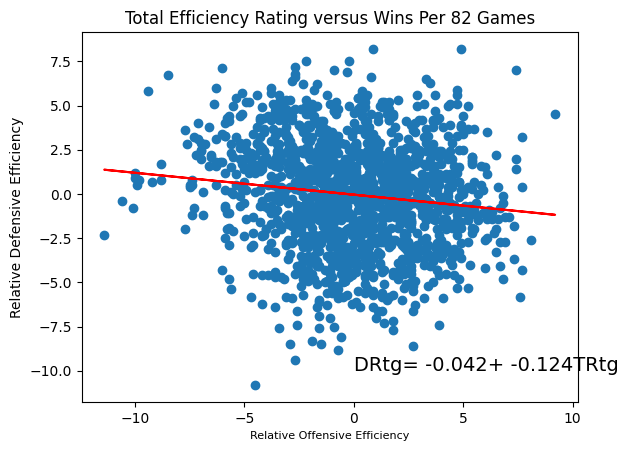

In [82]:
import numpy as np
x = np.array(df["Rel_ORtg"])
y = np.array(df["Rel_DRtg"])
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red', linestyle = '-')
plt.text(0, -10, "DRtg= " + "{:.3f}".format(b) + "+ {:.3f}".format(m) + "TRtg", size = 14)
plt.xlabel("Relative Offensive Efficiency", size = 8)
plt.ylabel("Relative Defensive Efficiency")
plt.title("Total Efficiency Rating versus Wins Per 82 Games")

This shows the correlation between relative offensive and relative defensive ratings and shows that there is a slight correlation but not a very strong one.  This suggests that whether a team is strong or poor offensively is not a good predictor of how strong they are defensively.

Text(100, 80, 'WP82G = 112.573+ -0.686DRtg')

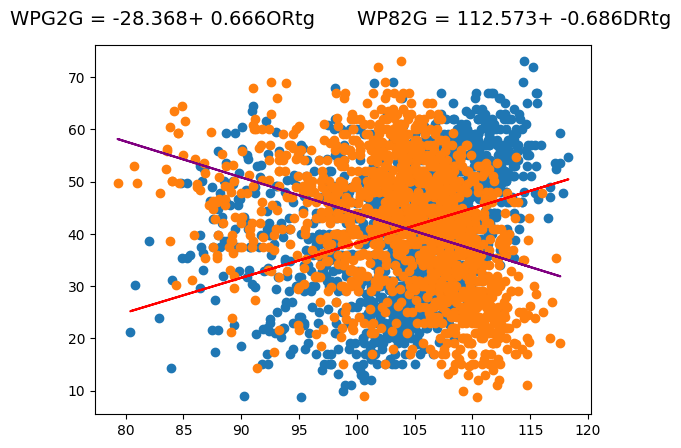

In [76]:
x1 = np.array(df["ORtg"])
x2 = np.array(df["DRtg"])
y = np.array(df["WP82G"])
plt.scatter(x1, y)
plt.scatter(x2, y)
m1, b1 = np.polyfit(x1, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x1, m1*x1 + b1, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(70, 80, "WPG2G = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "ORtg", size = 14)
plt.text(100, 80, "WP82G = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "DRtg", size = 14)

Defensive efficiency appears to be slightly better at predicting wins compared to offensive deficiency.  The saying "Defense wins championships" may be right, but there are plenty of teams with strong defenses that won very few games.  There is a team that allowed fewer than 85 points per 100 possessions and that team only won roughly 30 games, and there are teams that allowed 115 points per 100 posssesions and won over 50 games.

Text(0, 80, 'WPG2G = 40.945+ -2.937DRtg')

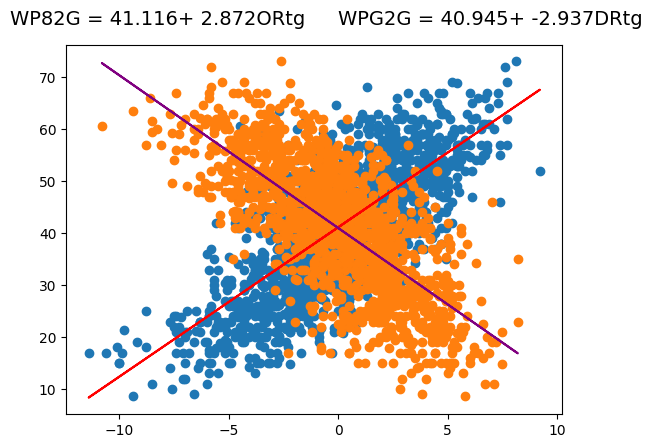

In [75]:
x1 = np.array(df["Rel_ORtg"])
x2 = np.array(df["Rel_DRtg"])
y = np.array(df["WP82G"])
plt.scatter(x1, y)
plt.scatter(x2, y)
m1, b1 = np.polyfit(x1, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x1, m1*x1 + b1, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(-15, 80, "WP82G = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "ORtg", size = 14)
plt.text(0, 80, "WPG2G = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "DRtg", size = 14)

The relative offensive/defensive ratings are much stronger predictors of how strong a team is compared to the regular offensive and defensive efficiency ratings.  This is likely because offensive and defensive efficiency ratings have varied over time.

Text(0, 0.5, 'Offensive/Defensive Efficiency Rating')

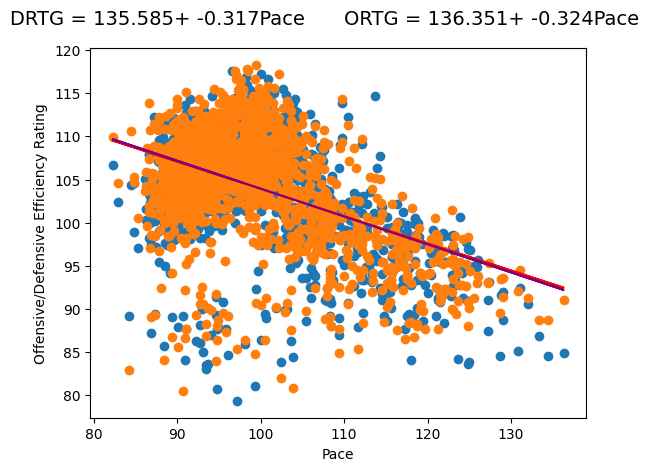

In [19]:
x = np.array(df["Pace"])
y1 = np.array(df["DRtg"])
y2 = np.array(df["ORtg"])
plt.scatter(x, y1)
plt.scatter(x, y2)
m1, b1 = np.polyfit(x, y1, 1)
m2, b2 = np.polyfit(x, y2, 1)
plt.plot(x, m1*x + b1, color = 'red', linestyle = '-')
plt.plot(x, m2*x + b2, color = 'purple', linestyle = '-')
plt.text(70, 123, "DRTG = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "Pace", size = 14)
plt.text(110, 123, "ORTG = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "Pace", size = 14)
plt.xlabel("Pace")
plt.ylabel("Offensive/Defensive Efficiency Rating")

This is interesting because it was shown that pace and wins are weakly correlated, but pace and offensive and deficiency ratings are, and offensive and deficiency ratings are strongly correlated with how many games a team wins.

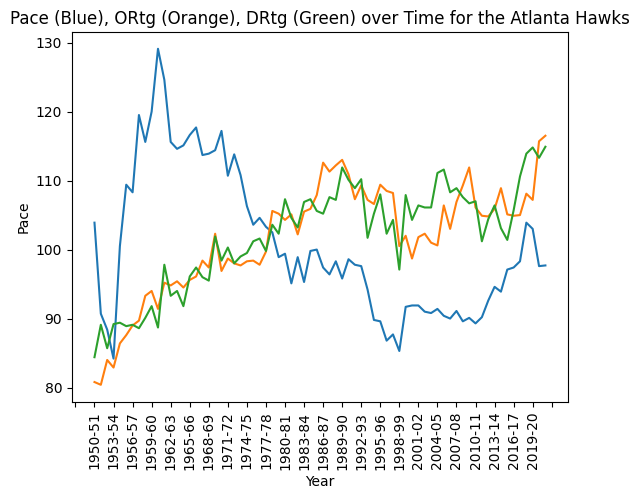

In [83]:
from matplotlib.dates import HourLocator, DayLocator, DateFormatter
#lakers = df.iloc[["Team"] == "Los Angeles Lakers"]
#df = df.loc[df["season"] != "2022-23"]
#df.plot.line(x = df["season"], y=df["Pace"])
#atl1 = df.loc[df['Team'] == 'Atlanta Hawks', 'Pace']
#atl2 = df.loc[df['Team'] == 'Atlanta Ha']
atl = df.iloc[0:72, [0,8,10,12]]
x = np.flip(np.array(atl["season"]))
y = np.flip(np.array(atl["Pace"]))
y2 = np.flip(np.array(atl["ORtg"]))
y3 = np.flip(np.array(atl["DRtg"]))
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(rotation = 90)
years = DayLocator(interval = 3)
plt.gca().xaxis.set_major_locator(years)
plt.xlabel("Year")
plt.ylabel("Pace")
plt.title("Pace (Blue), ORtg (Orange), DRtg (Green) over Time for the Atlanta Hawks")
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
lin_fit = LinearRegression()
X = (df[["SRS", "Rel_Pace", "Rel_ORtg", "Rel_DRtg"]])
Y = np.array(df["WP82G"])
lin_fit.fit(X, Y)
y_pred = lin_fit.predict(X)

[1.0549097  0.01261919 1.55883785 1.59679896]


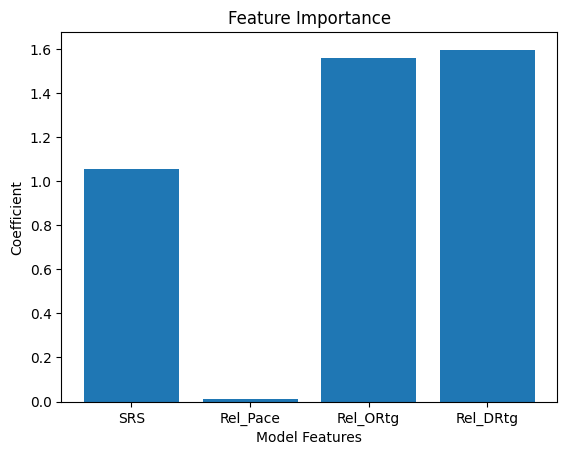

In [71]:
feature_importance = abs(lin_fit.coef_)
feature_names = ["SRS", "Rel_Pace", "Rel_ORtg", "Rel_DRtg"]
plt.bar(feature_names, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Model Features")
plt.ylabel("Coefficient")
plt.show
print(abs(lin_fit.coef_))

While the graph shows that Rel_ORtf and Rel_DRtf are more important than SRS, this is not necessarily true as the y axis is only a measure of the coefficient, not of the coefficient divided by the standard error of the coefficient.

In [ ]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
t_scor = {}
print(ols_result.HC0_se)
for i in range(4):
  t_scor[feature_names[i]] = feature_importance[i]/ols_result.HC0_se[i]
print(t_scor)

This output shows the t scores for the four different variables and that Relative Offensive Rating and Relative Defensive Rating are the two best predictors of Wins Per 82 Games. Relative Pace is an extremely poor predictor of WP82G. What this suggests is that strong teams can win playing either fast or slow.

In [ ]:
import tensorflow as tf
tf.random.set_seed(1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(X_train))
#print(X_train)
#print(normalizer.mean.numpy())
first = np.array(X_train[:1])
#print(first)
model = tf.keras.Sequential([normalizer, tf.keras.layers.Dense(units = 1)])
model.predict(X_train[:10])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics = [
        tf.keras.metrics.BinaryAccuracy(name="accuracy")])

In [ ]:
#print(X_train)
#print(y_train)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
from matplotlib import rcParams

plt.plot(np.arange(1, 101), history.history['loss'], label='Loss', color = "blue")
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy', color = "orange")
plt.title("Model Evaluation of Loss (Blue) and Accuracy(Orange)")
plt.xlabel("Number of Epochs")